# Load data

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/movie_metadata.csv')
df['raw'].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Pre processing

In [90]:
df['numeric'] = df['raw']._get_numeric_data()

In [3]:
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))

Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%


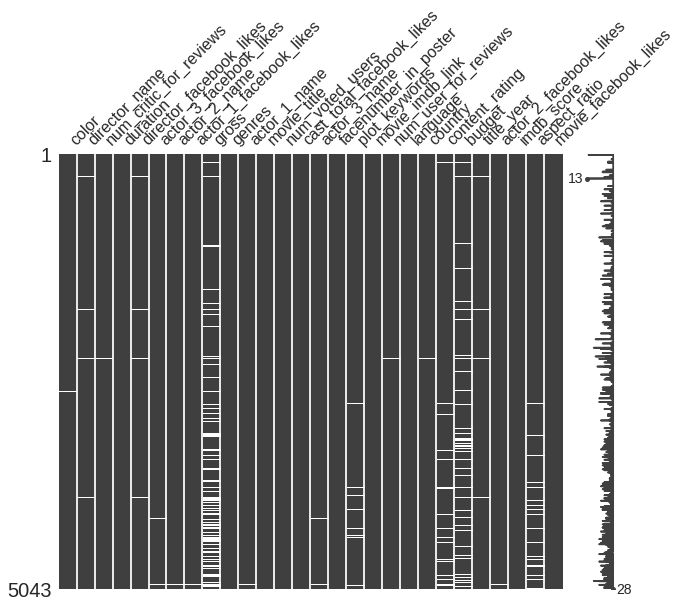

In [4]:
msno.matrix(df['raw'],figsize=(10,8))

The N/A mostly lies in the actor 1 facebook likes column and the budget column.  
The approach will be to investigate the result of just removing lines, and the result when the 2  columns mentioned above is removed before the N/A lines are removed.  
Also the link to imdb should be removed.

In [5]:
del df['raw']['movie_imdb_link']
del df['raw']['movie_title']
df['no_na_col'] = pd.DataFrame.copy(df['raw'])
del df['no_na_col']['budget']
del df['no_na_col']['plot_keywords']


#Removing actor 1 facebook likes turn out to help very little.
#del df['no_na_col']['actor_1_facebook_likes']del df['no_na_col']['budget']del df['no_na_col']['budget']del df['no_na_col']['budget']


print('Before columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))
print('\nAfter columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['no_na_col'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['no_na_col'].isnull().values.sum()/df['no_na_col'].shape[0]))

df['no_na_col'] = df['no_na_col'].dropna()

Before columns are removed
Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%

After columns are removed
Amount of lines containing N/A:		2053
Percent of lines containing N/A:	40.71%


Now the data is cleaned, the text features should be k-coded

In [6]:
#find all numeric column labels
numeric_columns = df['no_na_row'].select_dtypes(include=[np.number]).columns.tolist()

numeric_columns = df['no_na_col'].select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df['no_na_col'][column] = ((df['no_na_col'][column]-df['no_na_col'][column].mean())/df['no_na_col'][column].std())



/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df['no_na_col'].loc[3]

color                                       Color
director_name                   Christopher Nolan
num_critic_for_reviews                    5.31988
duration                                  2.42702
director_facebook_likes                   7.06826
actor_3_facebook_likes                    12.0835
actor_2_name                       Christian Bale
actor_1_facebook_likes                    1.27806
gross                                     5.75892
genres                            Action|Thriller
actor_1_name                            Tom Hardy
num_voted_users                           7.00811
cast_total_facebook_likes                 5.09806
actor_3_name                 Joseph Gordon-Levitt
facenumber_in_poster                    -0.675875
num_user_for_reviews                      5.89494
language                                  English
country                                       USA
content_rating                              PG-13
title_year                               0.895634


Removed columns:  
IMDB_link  
movie_title 


In [8]:
df['no_na_col']['color'].value_counts().head()

Color               3632
 Black and White     124
Name: color, dtype: int64

In [9]:
#Maps atribute color as one hot notation 
d = {'Color': 1, ' Black and White': 0}
df['no_na_col']['color'] = df['no_na_col']['color'].map(d)
df['no_na_col'] = df['no_na_col'].loc[: , ~df['no_na_col'].columns.duplicated()]

#Maps single column in one hot notation
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['language'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['country'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['content_rating'].str.get_dummies()],axis=1)

#Maps multiword attribute to one hot notation
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_col']['genres'].str.get_dummies(sep='|')],axis=1)

#Maps multiple columns (actor 1,2,3) into "was he in the movie" one hot notation
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['actor_2_name'].map(str).str.cat(df['no_na_col']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_col']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)

#clean up
df['no_na_col'] = df['no_na_col'].drop(['genres','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating' ],axis=1)

/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


For clustering, a version is made with a column "is steven spielberg director", and for the regression, a one hut of the directors are made.

In [10]:
#copy the dataframe to two new dataframes
df['c_no_na_col'] = pd.DataFrame.copy(df['no_na_col'])

#onehot of the director for the column versions
df['c_no_na_col']['SS_director']=(df['no_na_col']['director_name'].str.contains('Steven Spielberg', na=0))

#change false/true to 0/1
df['c_no_na_col']['SS_director'] = df['c_no_na_col']['SS_director'].astype(int)

# drop column director name
del df['c_no_na_col']['director_name']


Steven Spielberg is the director which occours most frequently in the dataset. It will be the focus to for the clustering, to cluster whether or not he directed the movie. There will be created 2 datasets, one for clustering and one for the regression part. One dataset will consist of a 

In [11]:
df['c_no_na_col'].shape

(3992, 6552)

In [12]:
df['c_no_na_col'].isnull().values.sum()
#msno.matrix(df['c_no_na_col'])
#df['c_no_na_col'].columns


0

In [95]:
# Regression preperationataset used in creating a regression model are:
#df['numeric_col_na'] = df['numeric_col_na'].dropna()
#df['r_no_na_col']
df['numeric_std'] = ((df['numeric_col_na'] - df['numeric_col_na'].mean()) / df['numeric_col_na'].std())
#Where 'r' is for regression, 'no_na' for non containing N/A's. The last col indicates if the dataset has dropped two columns containing many N/A's and then all N/A's for all rows. The dataset has been interpreted and standardized.
#del df['numeric_col_na']['gross']
#del df['numeric_col_na']['budget']
df['numeric_std'].isnull().values.sum()

0

# Regression

The dataset used in creating a regression model are:
- df['r_no_na_col']

Where 'r' is for regression, 'no_na' for non containing N/A's. The last col indicates if the dataset has dropped two columns containing many N/A's and then all N/A's for all rows. The dataset has been interpreted and standardized.

## Problem formulation
Since the purpose of the website IMDB is to give a score to movies, a model is created for predicting the score of a movie from metadata of a movie. The actual values to predict are stored in the column 'imdb_score', all other columns in the dataset are metadata for different movies.

In [97]:
# Split dataset into input data and prediction data
X = df['numeric_std'].loc[:, df['numeric_std'].columns != 'imdb_score']
y = df['numeric_std']['imdb_score']
print("Shape 'numeric_std':\n", X.shape)

# Dataset containing without column dropped
#X_row = df['r_no_na_row'].loc[:, df['r_no_na_row'].columns != 'imdb_score']
#y_row = df['r_no_na_row']['imdb_score']
#print("Shape 'row':\n", X_row.shape)

Shape 'numeric_std':
 (3801, 14)


## Apply linear regression with forward selection
Is transforming or combining attributes useful?
- It can be useful to plot the residual error vs. the attribute.

DEBUG - TIMESTAMP: 2017-11-14 01:47:47 - CV: 1/5
DEBUG - TIMESTAMP: 2017-11-14 01:47:47 - Squared error no input done!
DEBUG - TIMESTAMP: 2017-11-14 01:47:47 - Squared error all input done!
DEBUG - TIMESTAMP: 2017-11-14 01:47:47 - Features selected
DEBUG - TIMESTAMP: 2017-11-14 01:47:47 - Model trained using Linear Regression with forward feature selection
Train on 3040 samples, validate on 761 samples
Epoch 1/20
3040/3040 [==============================] - 2s - loss: 2.1761 - acc: 0.0000e+00 - val_loss: 1.9003 - val_acc: 0.0000e+00
Epoch 2/20
3040/3040 [==============================] - 0s - loss: 2.0047 - acc: 0.0000e+00 - val_loss: 1.7764 - val_acc: 0.0000e+00
Epoch 3/20
3040/3040 [==============================] - 0s - loss: 1.8687 - acc: 0.0000e+00 - val_loss: 1.6754 - val_acc: 0.0000e+00
Epoch 4/20
3040/3040 [==============================] - 0s - loss: 1.7550 - acc: 0.0000e+00 - val_loss: 1.5906 - val_acc: 0.0000e+00
Epoch 5/20
3040/3040 [==============================] - 0s - l

3041/3041 [==============================] - 0s - loss: 1.5930 - acc: 0.0000e+00 - val_loss: 1.3703 - val_acc: 0.0000e+00
Epoch 13/20
3041/3041 [==============================] - 0s - loss: 1.5335 - acc: 0.0000e+00 - val_loss: 1.3302 - val_acc: 0.0000e+00
Epoch 14/20
3041/3041 [==============================] - 0s - loss: 1.4784 - acc: 0.0000e+00 - val_loss: 1.2929 - val_acc: 0.0000e+00
Epoch 15/20
3041/3041 [==============================] - 0s - loss: 1.4273 - acc: 0.0000e+00 - val_loss: 1.2580 - val_acc: 0.0000e+00
Epoch 16/20
3041/3041 [==============================] - 0s - loss: 1.3798 - acc: 0.0000e+00 - val_loss: 1.2254 - val_acc: 0.0000e+00
Epoch 17/20
3041/3041 [==============================] - 0s - loss: 1.3356 - acc: 0.0000e+00 - val_loss: 1.1949 - val_acc: 0.0000e+00
Epoch 18/20
3041/3041 [==============================] - 0s - loss: 1.2945 - acc: 0.0000e+00 - val_loss: 1.1662 - val_acc: 0.0000e+00
Epoch 19/20
3041/3041 [==============================] - 0s - loss: 1.2560

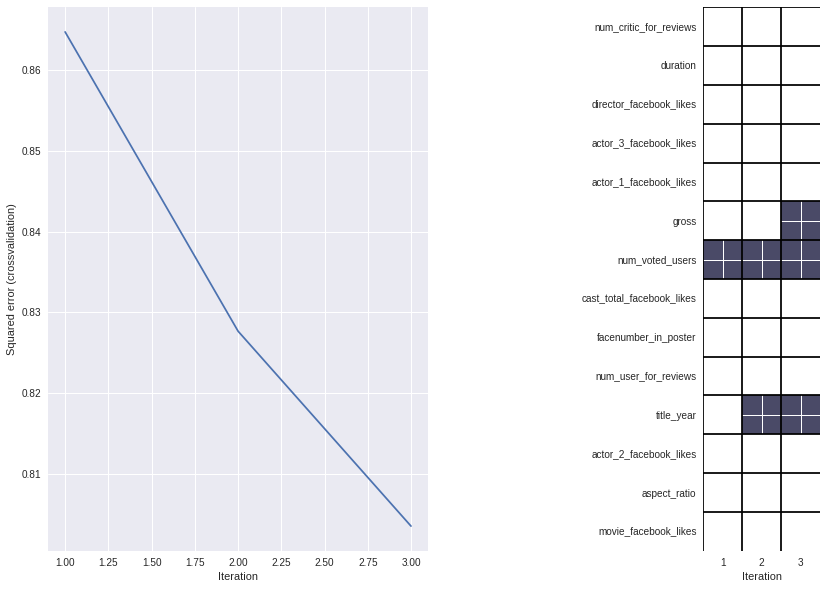

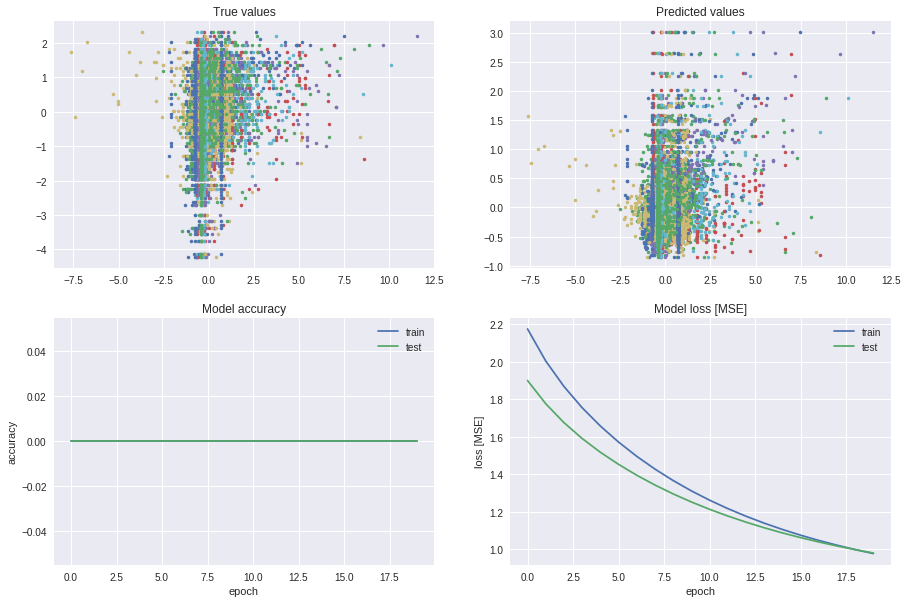

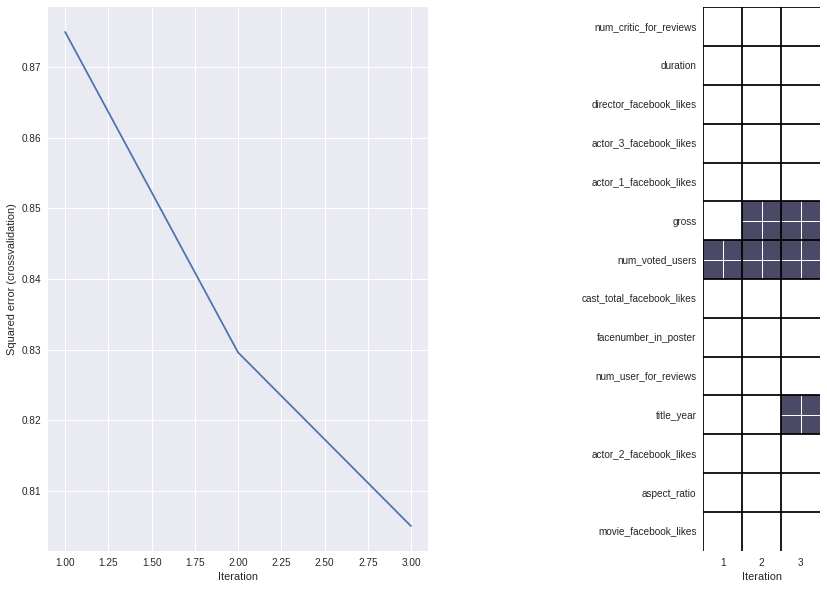

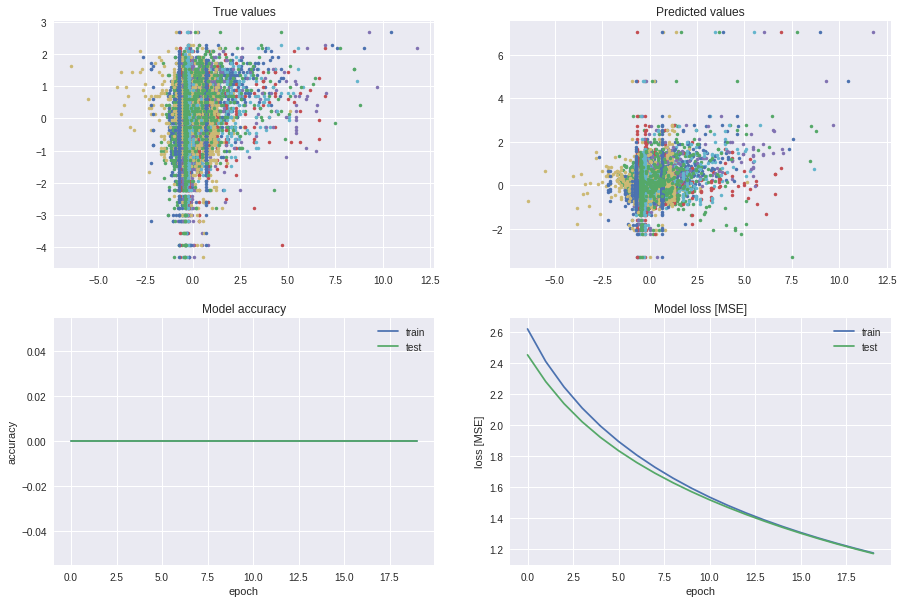

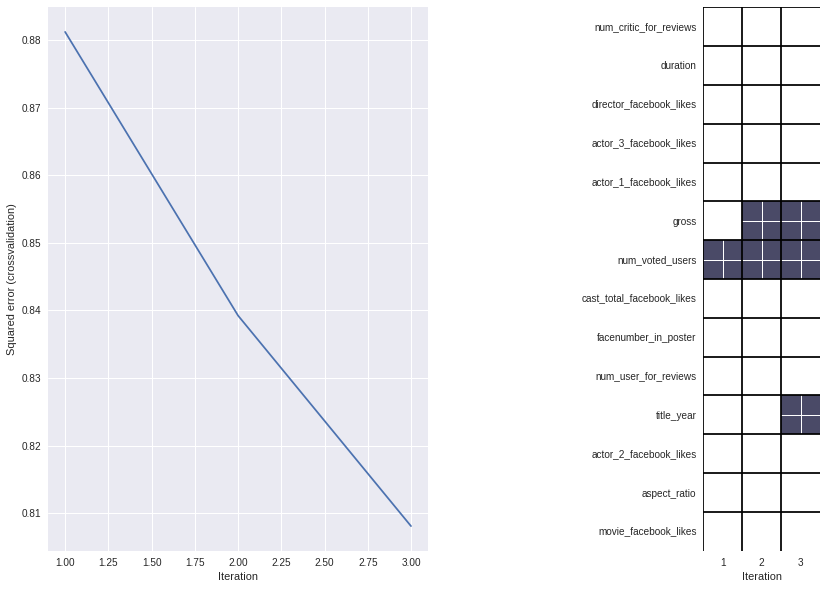

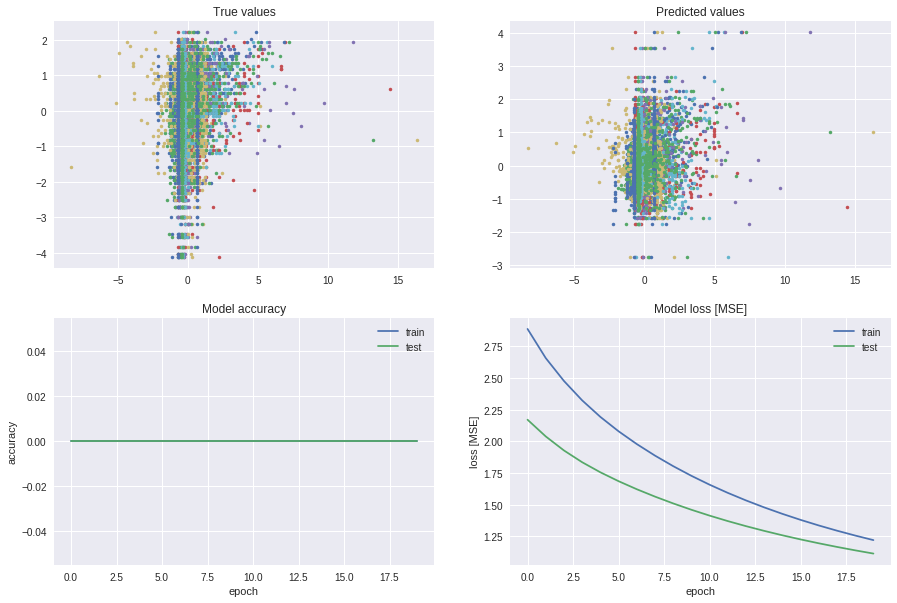

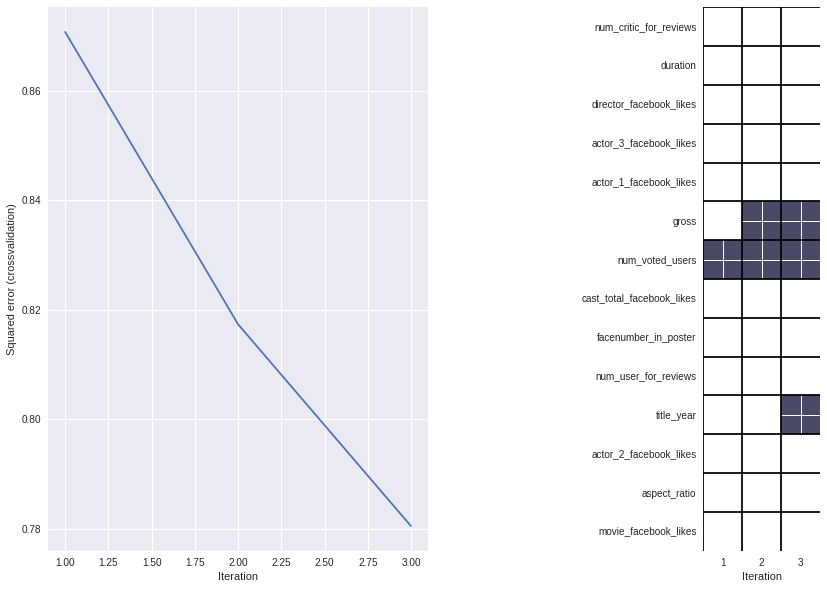

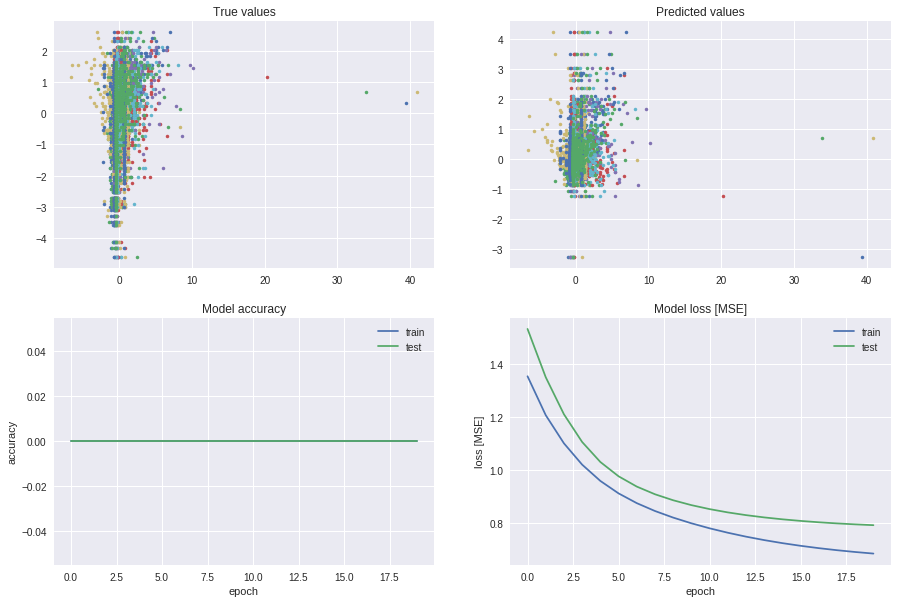

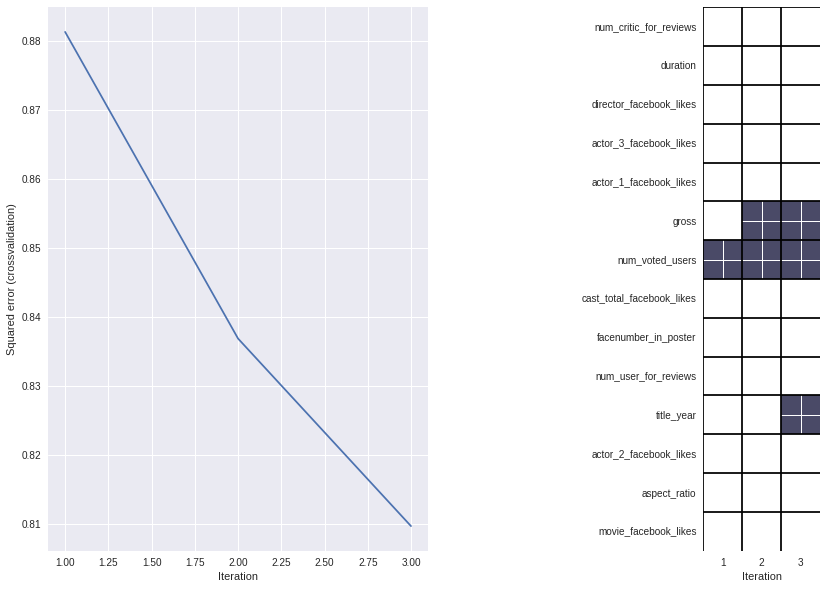

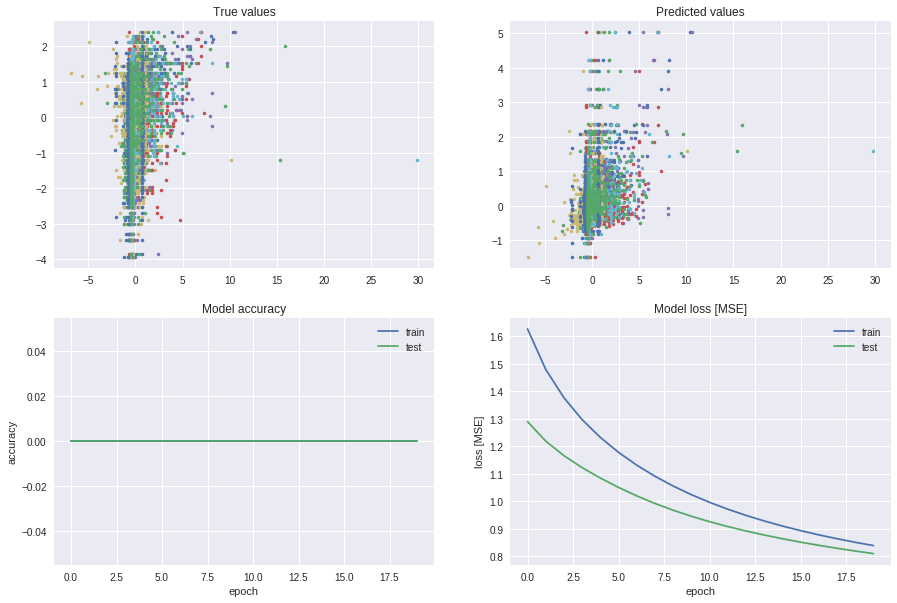

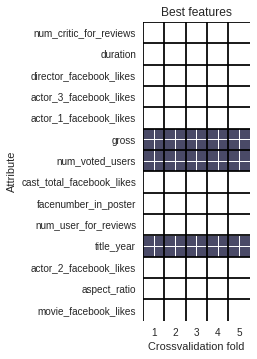

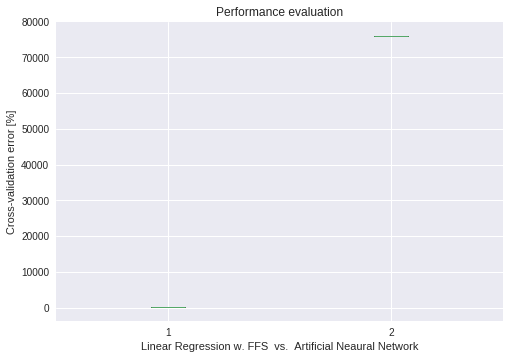

In [98]:
# Plot imports
import matplotlib.pyplot as plt

# Linear Regression and Forward Feature Selection imports
from toolbox_02450 import feature_selector_lr, bmplot
from sklearn import cross_validation
import sklearn.linear_model as lm

# ANN imports
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# Statistical computing imports
from scipy import stats

# Debug imports
from datetime import datetime

# Size of input data for use in cross validation
N, M = X.shape

# Number of folds
K = 5
CV = cross_validation.KFold(N, K, shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
# Variables for paired t-test
Error_LM = np.empty((K,1))
Error_ANN = np.empty((K,1))

# SKRIV HER
k = 0
for train_index, test_index in CV:
    
    # TIMESTAMP (debug)
    print("DEBUG - TIMESTAMP: {0} - CV: {1}/{2}".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'), k+1, K))
    
    # Extract training and test set for current CV fold
    X_train = X.values[train_index,:]
    y_train = y.values[train_index]
    X_test = X.values[test_index,:]
    y_test = y.values[test_index]
    
    ### LINEAR MODEL w. FFS ###
    
    # Cross validation folds for feature selection
    internal_cross_validation = 2
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]
    print("DEBUG - TIMESTAMP: {} - Squared error no input done!".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
    print("DEBUG - TIMESTAMP: {} - Squared error all input done!".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # Compute squared error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    print("DEBUG - TIMESTAMP: {} - Features selected".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    Features[selected_features,k]=1
    
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m_LM = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m_LM.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m_LM.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
        y_LM = m_LM.predict(X_test[:,selected_features]).sum()/y_test.shape[0]
        Error_LM[k] = 100*(y_LM!=y_test).sum().astype(float)/len(y_test)
        print("DEBUG - TIMESTAMP: {} - Model trained using Linear Regression with forward feature selection".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
        
        plt.figure(k, figsize=(15,10))
        plt.subplot(1,2,1)
        plt.plot(range(1,len(loss_record)), loss_record[1:])
        plt.xlabel('Iteration')
        plt.ylabel('Squared error (crossvalidation)')    
        
        plt.subplot(1,3,3)
        bmplot(X.columns.values, range(1,features_record.shape[1]), -features_record[:,1:])
        plt.clim(-1.5,0)
        plt.xlabel('Iteration')

    #print('Cross validation fold {0}/{1}'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}'.format(test_index))
    #print('Features no: {0}\n'.format(selected_features.size))
    

    ### Artificial Neural Network Model ###
    
    # Create model
    m_ANN = Sequential()
    m_ANN.add(Dense(10, activation='linear', input_dim=X_train.shape[1],))
    m_ANN.add(Dense(1, activation='linear'))

    # Compile model
    adam = optimizers.Adam(lr=0.001,
                           beta_1=0.9,
                           beta_2=0.999,
                           epsilon=1e-08,
                           decay=0.0)
    m_ANN.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

    # Fit model
    history = m_ANN.fit(X_train,y_train,
                        validation_data=(X_test,y_test),
                        epochs = 20,
                        batch_size=500,
                        shuffle=False)

    # Evaluate model and calculate 
    y_ANN = m_ANN.predict(X_test, batch_size = 1000)
    Error_ANN[k] = 100*(y_ANN!=y_test).sum().astype(float)/len(y_test)
    print("DEBUG - TIMESTAMP: {} - Model trained using ANN".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
    
    # True values plot
    plt.figure(k+10, figsize=(15,10))
    plt.subplot(2,2,1)
    plt.plot(X_test, y_test, ls='', marker='.');
    plt.title('True values');

    # Predicted values plot
    plt.subplot(2,2,2)
    plt.plot(X_test, y_ANN, ls='', marker='.');
    plt.title('Predicted values');

    # Visualize accuracy performance
    plt.subplot(2,2,3)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

    # Visualize loss performance (MSE)
    plt.subplot(2,2,4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss [MSE]')
    plt.ylabel('loss [MSE]')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

    k+=1
    
# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

# Plot best features each CV fold
plt.figure(k+199)
plt.subplot(1,3,2)
bmplot(X.columns.values, range(1,Features.shape[1]+1), -Features)
plt.clim(-1.5,0)
plt.title('Best features')
plt.xlabel('Crossvalidation fold')
plt.ylabel('Attribute')
    
# Boxplot to compare classifier error distributions
plt.figure(k+200)
plt.boxplot(np.bmat('Error_LM, Error_ANN'))
plt.title('Performance evaluation')
plt.xlabel('Linear Regression w. FFS  vs.  Artificial Neaural Network')
plt.ylabel('Cross-validation error [%]')

plt.show()

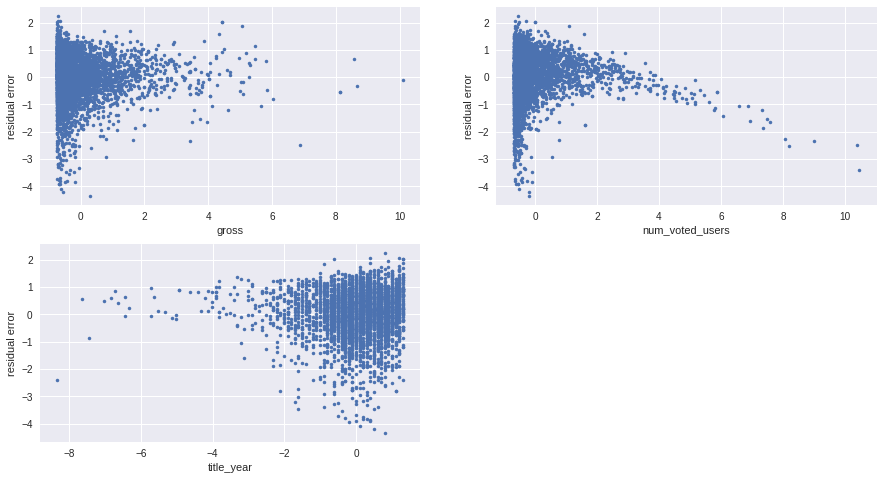

In [99]:
f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X.iloc[:,ff], y)
    
    y_est= m.predict(X.iloc[:,ff])
    residual=y-y_est
    
    plt.figure(k+1, figsize=(15,8))
    plt.title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
        plt.subplot(2,np.ceil(len(ff)/2.0),i+1)
        plt.plot(X.iloc[:,ff[i]],residual,'.')
        plt.xlabel(X.columns[ff[i]])
        plt.ylabel('residual error')
    plt.show()

## Explain how a new observation is predicted
- Normalize

## Neural network model fitting

## Performance evalutation
Neural network vs. linear regression
- Use a paired t-test as described in lesson 6

In [100]:
LM_test = Error_LM
ANN_test = Error_ANN
[tstatistic, pvalue] = stats.ttest_ind(LM_test,ANN_test)
alpha = 0.05
if pvalue <= alpha:
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')

Classifiers are not significantly different


# Classification

## Problem formulation
For the classification, we will try to clasify wether steven spielberg was the director of the movie, or not.  
The following three methods will be used for this:
Decision Trees, K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN).



## Apply three of the given methods
Two level cross validation


### Creating test set

In [110]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(df['c_no_na_col'].iloc[:, df['c_no_na_col'].columns != 'SS_director'],
                                                    df['c_no_na_col']['SS_director'], 
                                                    test_size=0.25)

### Decision trees

In [111]:
from sklearn import cross_validation, tree
#### two layer cross validation decision tree
#select X and Y                                                
X = df['c_no_na_col'].iloc[:, df['c_no_na_col'].columns != 'SS_director']
y = df['c_no_na_col']['SS_director']

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 21, 1)

# K-fold crossvalidation setup
K = 10
CV = cross_validation.KFold(X.shape[0],K,shuffle=True)

# Initialize variable
TREE_Error_train = np.empty((len(tc),K))
TREE_Error_test = np.empty((len(tc),K))

#Outer loop (Kfold)
k=0
for train_index, test_index in CV:
    # Print info on progress
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))
    
    # get train and test values for current KFold
    X_train, y_train = X.iloc[train_index,:], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index,:], y.iloc[test_index]
    
    # inner loop (model selection)
    for i, t in enumerate(tc):
        
        # clasify
        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=t)
        clf = clf.fit(X_train, y_train)

        #predict
        y_est_test = clf.predict(X_test)
        y_est_train = clf.predict(X_train)
    
        #evaluate misclasification in the current Kfold
        misclass_rate_test = sum(np.abs(y_est_test - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(y_est_train - y_train)) / float(len(y_est_train))
        TREE_Error_test[i,k], TREE_Error_train[i,k] = misclass_rate_test, misclass_rate_train
    
    # increment kfold counter
    k+=1

Computing CV fold: 1/10..
Computing CV fold: 2/10..
Computing CV fold: 3/10..
Computing CV fold: 4/10..
Computing CV fold: 5/10..
Computing CV fold: 6/10..
Computing CV fold: 7/10..
Computing CV fold: 8/10..
Computing CV fold: 9/10..
Computing CV fold: 10/10..


/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  """Entry point for launching an IPython kernel.
/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  


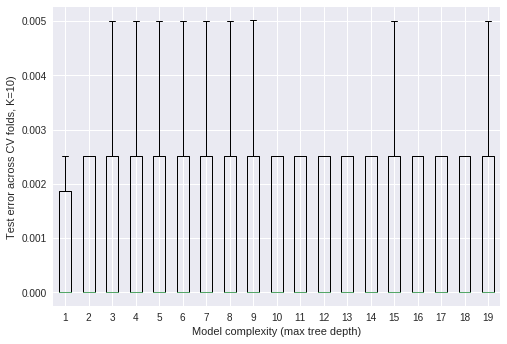

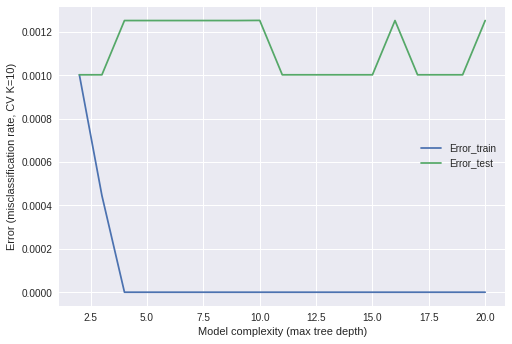

In [112]:
f = plt.figure(); f.hold(True)
plt.boxplot(TREE_Error_test.T)
plt.xlabel('Model complexity (max tree depth)')
plt.ylabel('Test error across CV folds, K={0})'.format(K))

f = plt.figure(); f.hold(True)
plt.plot(tc, TREE_Error_train.mean(1))
plt.plot(tc, TREE_Error_test.mean(1))
plt.xlabel('Model complexity (max tree depth)')
plt.ylabel('Error (misclassification rate, CV K={0})'.format(K))
plt.legend(['Error_train','Error_test'])
    
plt.show()

### KNN

In [ ]:
import datetime
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
#### two layer cross validation K-nearest neighbor
#select X and Y                                                
X = X_TRAIN
y = y_TRAIN

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 6, 1)

# K-fold crossvalidation setup
K = 10
CV = cross_validation.KFold(X.shape[0],K,shuffle=True)

# Initialize variable
KN_Error_train = np.empty((len(tc),K))
KN_Error_test = np.empty((len(tc),K))

#Outer loop (Kfold)
k=0
for train_index, test_index in CV:
    # Print info on progress
    now = datetime.datetime.now()
    print(now)
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))
    
    # get train and test values for current KFold
    X_train, y_train = X.iloc[train_index,:], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index,:], y.iloc[test_index]
    
    # inner loop (model selection)
    for i, t in enumerate(tc):
        
        # clasify
        neigh = KNeighborsClassifier(n_neighbors=t)
        neigh.fit(X_train, y_train) 

        #predict
        y_est_test = neigh.predict(X_test)
        y_est_train = neigh.predict(X_train)
    
        #evaluate misclasification in the current Kfold
        misclass_rate_test = sum(np.abs(y_est_test - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(y_est_train - y_train)) / float(len(y_est_train))
        KN_Error_test[i,k], KN_Error_train[i,k] = misclass_rate_test, misclass_rate_train
    
    # increment kfold counter
    k+=1

2017-11-14 12:07:07.855667
Computing CV fold: 1/10..
2017-11-14 12:10:39.384973
Computing CV fold: 2/10..
2017-11-14 12:14:20.571912
Computing CV fold: 3/10..
2017-11-14 12:17:49.219770
Computing CV fold: 4/10..
2017-11-14 12:21:15.464820
Computing CV fold: 5/10..
2017-11-14 12:24:39.043886
Computing CV fold: 6/10..
2017-11-14 12:28:03.420471
Computing CV fold: 7/10..
2017-11-14 12:31:29.455473
Computing CV fold: 8/10..


/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  """Entry point for launching an IPython kernel.
/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  


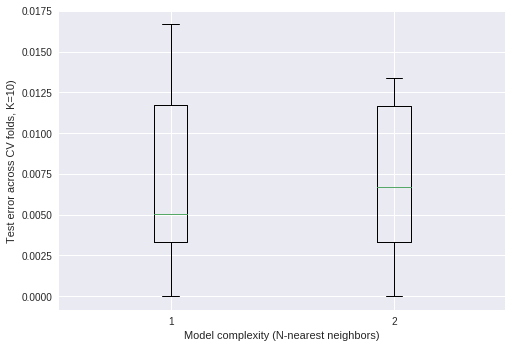

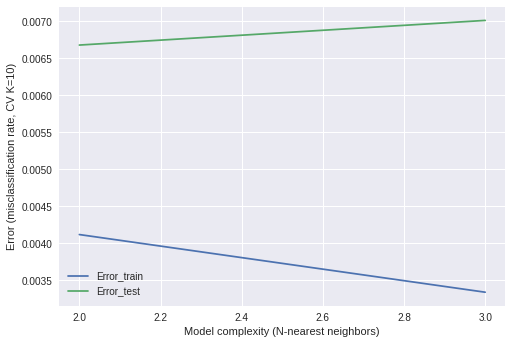

In [18]:
f = plt.figure(); f.hold(True)
plt.boxplot(KN_Error_test.T)
plt.xlabel('Model complexity (N-nearest neighbors)')
plt.ylabel('Test error across CV folds, K={0})'.format(K))

f = plt.figure(); f.hold(True)
plt.plot(tc, KN_Error_train.mean(1))
plt.plot(tc, KN_Error_test.mean(1))
plt.xlabel('Model complexity (N-nearest neighbors)')
plt.ylabel('Error (misclassification rate, CV K={0})'.format(K))
plt.legend(['Error_train','Error_test'])
    
plt.show()

### Nerual Network

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from sklearn import cross_validation
import datetime

#### two layer cross validation decision tree
#select X and Y                                                
X = X_TRAIN
y = y_TRAIN

# Tree complexity parameter - constraint on maximum depth
tc = np.arange(2, 15, 1)

# K-fold crossvalidation setup
K = 10
CV = cross_validation.KFold(X.shape[0],K,shuffle=True)

# Initialize variable
NN_Error_train = np.empty((len(tc),K))
NN_Error_test = np.empty((len(tc),K))

#Outer loop (Kfold)
k=0
for train_index, test_index in CV:
    # Print info on progress
    now = datetime.datetime.now()
    print(now)
    print('Computing CV fold: {0}/{1}..'.format(k+1,K))
    
    # get train and test values for current KFold
    X_train, y_train = X.iloc[train_index,:], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index,:], y.iloc[test_index]
    
    # inner loop (model selection)
    for i, t in enumerate(tc):
        
        model = Sequential()

        # adding layers
        model.add(Dense(t*10, activation='relu', input_dim=X_train.shape[1],))
        model.add(Dense(t*5, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        # tweaking settings
        adam = optimizers.Adam(lr=0.001, beta_1=0.9,
        beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

        # fitting model
        history = model.fit(X_train.values,y_train.values, validation_data=(X_test.values,y_test.values),
        epochs = 25, batch_size=500, shuffle=False,verbose=0)
        
        # predict
        y_est_test = model.predict(X_test.values, batch_size = 1000).reshape((-1,))
        y_est_train = model.predict(X_train.values, batch_size = 1000).reshape((-1,))
    
        #evaluate misclasification in the current Kfold
        misclass_rate_test = sum(np.abs(y_est_test - y_test)) / float(len(y_est_test))
        misclass_rate_train = sum(np.abs(y_est_train - y_train)) / float(len(y_est_train))
        NN_Error_test[i,k], NN_Error_train[i,k] = misclass_rate_test, misclass_rate_train
    
    # increment kfold counter
    k+=1

Using TensorFlow backend.
/home/bok/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


2017-11-13 22:57:56.030439
Computing CV fold: 1/10..
2017-11-13 22:59:22.435693
Computing CV fold: 2/10..
2017-11-13 23:00:46.530092
Computing CV fold: 3/10..
2017-11-13 23:02:30.513626
Computing CV fold: 4/10..
2017-11-13 23:03:58.475522
Computing CV fold: 5/10..
2017-11-13 23:05:39.051924
Computing CV fold: 6/10..
2017-11-13 23:07:20.783407
Computing CV fold: 7/10..
2017-11-13 23:09:17.181499
Computing CV fold: 8/10..
2017-11-13 23:11:29.047893
Computing CV fold: 9/10..
2017-11-13 23:13:34.398235
Computing CV fold: 10/10..


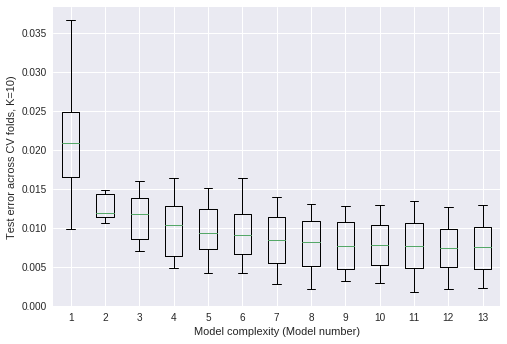

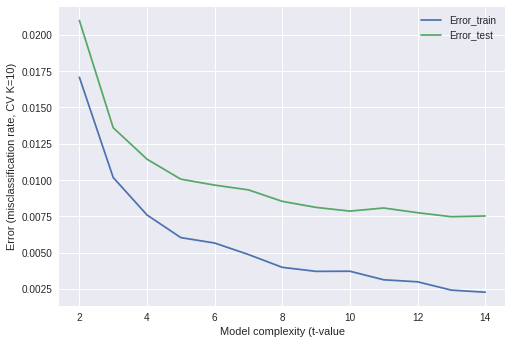

In [20]:
f = plt.figure()
plt.boxplot(NN_Error_test.T)
plt.xlabel('Model complexity (Model number)')
plt.ylabel('Test error across CV folds, K={0})'.format(K))

f = plt.figure()
plt.plot(tc, NN_Error_train.mean(1))
plt.plot(tc, NN_Error_test.mean(1))
plt.xlabel('Model complexity (t-value')
plt.ylabel('Error (misclassification rate, CV K={0})'.format(K))
plt.legend(['Error_train','Error_test'])
    
plt.show()

## Explain how a new observation is classified

## Performance evaluation

### decision tree

In [38]:
from sklearn import tree

# set X and y values
#X = pd.DataFrame([[0, 0], [1, 1]])
#Y = pd.DataFrame(df['c_no_na_col'].shape)

# clasify
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf = clf.fit(X_TRAIN, y_TRAIN)

#predict
y_pred = clf.predict(X_TEST)


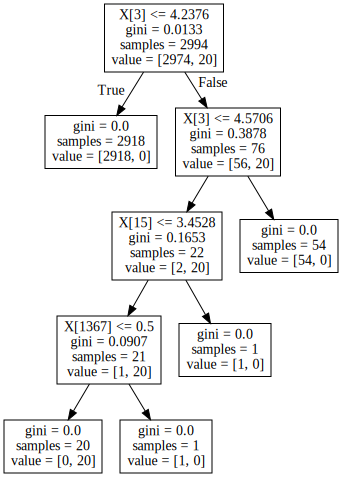

In [39]:
import graphviz 

# makes a graphical version of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

# show in output
graph


#export as PDF (iris.pdf)
#graph.render("iris")

In [40]:
import collections

print('Prediction:',collections.Counter(y_pred))
print('Test data:',collections.Counter(y_TEST))

Prediction: Counter({0: 992, 1: 6})
Test data: Counter({0: 993, 1: 5})


In [41]:
#test if the predicted location match the real locations
for i in range(len(y_pred)):
    real_value= y_TEST.iloc[i]
    if (y_pred[i] >0.5):
        if y_pred[i] == real_value:
            print('correct')
        else:
            print('False')
            print(i)

False
197
correct
correct
correct
correct
False
950


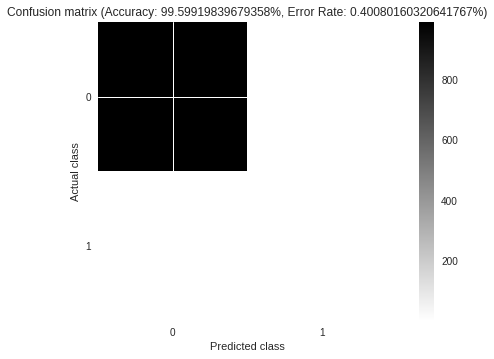

In [50]:
from matplotlib.pyplot import (figure, hold, plot, title, xlabel, ylabel, 
                               colorbar, imshow, xticks, yticks, show)
from sklearn.metrics import confusion_matrix
# Compute and plot confusion matrix
cm = confusion_matrix(y_TEST, y_pred);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
figure(2);
imshow(cm, cmap='binary', interpolation='None');
colorbar()
xticks(range(2)); yticks(range(2));
xlabel('Predicted class'); ylabel('Actual class');
title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

show()

### K-nearest

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# set x and y values
# X = pd.DataFrame([[0], [1], [2], [3]])
# y = pd.Series([0, 0, 1, 1])

# clasify
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_TRAIN, y_TRAIN) 

# predict
y_pred = neigh.predict(X_TEST)


In [59]:
print('Prediction:',collections.Counter(y_pred))
print('Test data:',collections.Counter(y_TEST))

Prediction: Counter({0: 993, 1: 5})
Test data: Counter({0: 993, 1: 5})


In [60]:
#test if the predicted location match the real locations
for i in range(len(y_pred)):
    real_value= y_TEST.iloc[i]
    if (y_pred[i] >0.5):
        if y_pred[i] == real_value:
            print('correct')
        else:
            print('False')
            print(i)

False
197
correct
correct
False
703
correct


### Neural network

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# creating model object
model = Sequential()

# adding layers
model.add(Dense(130, activation='relu', input_dim=X_TRAIN.shape[1],))
model.add(Dense(65, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# tweaking settings
adam = optimizers.Adam(lr=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# fitting model
history = model.fit(X_TRAIN.values,y_TRAIN.values, validation_data=(X_TEST.values,y_TEST.values),
epochs = 80, batch_size=100, shuffle=False)
y_pred = model.predict(X_TEST.values, batch_size = 1000)

Train on 2994 samples, validate on 998 samples
Epoch 1/80
2994/2994 [==============================] - 3s - loss: 0.3370 - acc: 0.9439 - val_loss: 0.0507 - val_acc: 0.9950
Epoch 2/80
2994/2994 [==============================] - 0s - loss: 0.0293 - acc: 0.9933 - val_loss: 0.0191 - val_acc: 0.9950
Epoch 3/80
2994/2994 [==============================] - 0s - loss: 0.0178 - acc: 0.9933 - val_loss: 0.0157 - val_acc: 0.9950
Epoch 4/80
2994/2994 [==============================] - 0s - loss: 0.0133 - acc: 0.9933 - val_loss: 0.0145 - val_acc: 0.9950
Epoch 5/80
2994/2994 [==============================] - 0s - loss: 0.0106 - acc: 0.9933 - val_loss: 0.0136 - val_acc: 0.9950
Epoch 6/80
2994/2994 [==============================] - 0s - loss: 0.0082 - acc: 0.9943 - val_loss: 0.0131 - val_acc: 0.9950
Epoch 7/80
2994/2994 [==============================] - 0s - loss: 0.0060 - acc: 0.9977 - val_loss: 0.0129 - val_acc: 0.9960
Epoch 8/80
2994/2994 [==============================] - 1s - loss: 0.0039 - ac

2994/2994 [==============================] - 0s - loss: 5.8263e-06 - acc: 1.0000 - val_loss: 0.0238 - val_acc: 0.9940
Epoch 65/80
2994/2994 [==============================] - 0s - loss: 5.6044e-06 - acc: 1.0000 - val_loss: 0.0239 - val_acc: 0.9940
Epoch 66/80
2994/2994 [==============================] - 0s - loss: 5.3942e-06 - acc: 1.0000 - val_loss: 0.0240 - val_acc: 0.9940
Epoch 67/80
2994/2994 [==============================] - 0s - loss: 5.1935e-06 - acc: 1.0000 - val_loss: 0.0241 - val_acc: 0.9940
Epoch 68/80
2994/2994 [==============================] - 0s - loss: 5.0038e-06 - acc: 1.0000 - val_loss: 0.0242 - val_acc: 0.9940
Epoch 69/80
2994/2994 [==============================] - 0s - loss: 4.8221e-06 - acc: 1.0000 - val_loss: 0.0243 - val_acc: 0.9940
Epoch 70/80
2994/2994 [==============================] - 0s - loss: 4.6496e-06 - acc: 1.0000 - val_loss: 0.0244 - val_acc: 0.9940
Epoch 71/80
2994/2994 [==============================] - 0s - loss: 4.4836e-06 - acc: 1.0000 - val_los

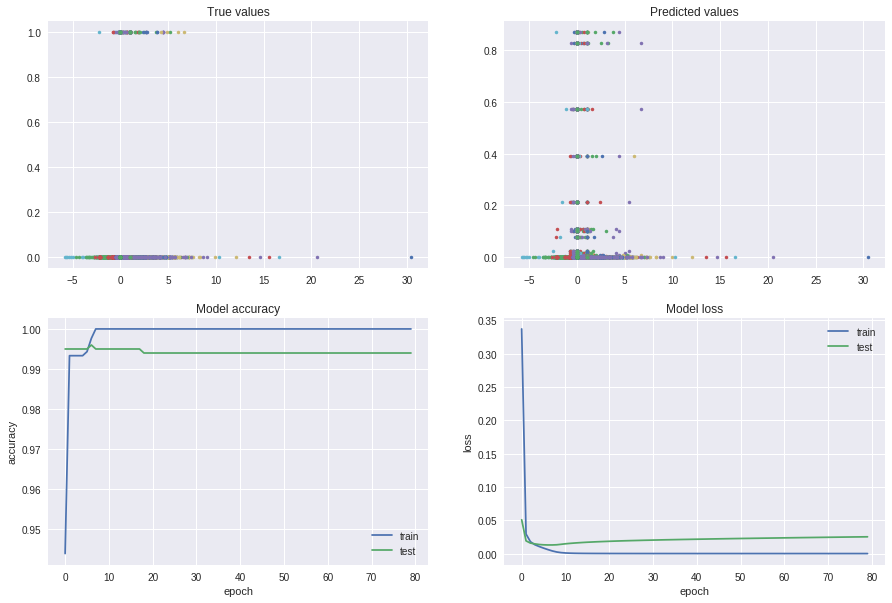

In [62]:
# true values plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(X_TEST,y_TEST, ls='', marker='.');
plt.title('True values');

# predicted values plotb
plt.subplot(2,2,2)
plt.plot(X_TEST,y_pred, ls='', marker='.');
plt.title('Predicted values');

# Visualize accuracy performance
plt.subplot(2,2,3)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')


# Visualize loss performance (MSE)
plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


In [63]:
import collections
rounded = [int(round(x[0])) for x in y_pred]
print('Prediction:',collections.Counter(rounded))
print('Test data:',collections.Counter(y_TEST))


Prediction: Counter({0: 995, 1: 3})
Test data: Counter({0: 993, 1: 5})


In [64]:
#test if the predicted location match the real locations
for i in range(len(y_pred)):
    real_value= y_TEST.iloc[i]
    if (rounded[i] >0.5):
        if y_pred[i] == real_value:
            print('correct')
        else:
            print('False')
            print(i)

False
460
False
906
False
992


### T-Test

In [75]:
from scipy import stats
kn_test = KN_Error_test.T[:,1]
tree_test = TREE_Error_test.T[:,13]
[tstatistic, pvalue] = stats.ttest_ind(kn_test,tree_test)
alpha = 0.05
if pvalue <= alpha:
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')

Classifiers are not significantly different


In [76]:
pvalue

0.001326420685933784

IndexingError: Too many indexers